# Exploring and Processing data - part 1

In [58]:
#imports
import pandas as pd
import numpy as np
import os
#import logger

## Import Data

In [59]:
#set the path of the raw data
#The join function of os.path constructs a pathname out of one or more partial pathnames.
#os.path.pardir => go to parent directory, access 'data' folder then 'raw' folder
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')



In [60]:
#read the data from the files using pd.read_csv
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [61]:
#check the type of file 
type(train_df)
type(test_df)

pandas.core.frame.DataFrame

## Basic Structure 

In [62]:
#info() gets basic infomation about the dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35

In [63]:
#The test dataset in kaggle doesnt have a 'survived' column, so adding that column for hmogenous data with -888
test_df['Survived'] = -888

In [64]:
#concatenate the test and train data. axis=0 means concatenate one df below other. axis=1 means sidewise.
df = pd.concat((train_df, test_df), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [68]:
#use head() and tail() to get top 5 rows and bottom 5 rows
df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [69]:
df.head(10)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [70]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [71]:
#select columns in dataframe. Can use head() to specify how many rows
df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [72]:
#select multiple rows
df[['Name', 'Age']].head(10)

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [73]:
#use loc for label based indexing, loc[1:10] means select those rows where index PassengerId is 1,2,3,4,5,6,7,8,9,10
df.loc[1:10]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [74]:
#select particular range of columns
df.loc[5:10, 'Age': 'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [75]:
#select discrete columns
df.loc[5:10, ['Age', 'Pclass']]

,Age,Pclass
PassengerId,,
5,35.0,3
6,NaN,3
7,54.0,1
8,2.0,3
9,27.0,3
10,14.0,2


In [76]:
#use iloc for position based indexing. Remember indexing starts with 0. So 5:10 means select 6th row to 
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [77]:
#filter on rows based on condition
male_passengers = df.loc[df.Sex == 'male',:]
#print('male_passengers=', male_passengers)
print('length=', len(male_passengers))
print('Number of Male passengers : {0}'.format(len(male_passengers)))

length= 843
Number of Male passengers : 843


In [78]:
#& and ! operators for complex logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers : {0}'.format(len(male_passengers_first_class)))

Number of male passengers : 179


## Summary Statistics

In [79]:
#use df.describe for summarry statistics for numerical columns

In [80]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [81]:
#use mean() and median()
print('Mean fare: {0}'. format(df.Fare.mean()))
print('Median fare: {0}'. format(df.Fare.median()))

Mean fare: 33.2954792813456
Median fare: 14.4542


In [82]:
#dispersion or variability measures
print('Fare range: {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 percentile: {0}'.format(df.Fare.quantile(.25)))
print('Fare variance: {0}'.format(df.Fare.var()))
print('Standard deviation: {0}'.format(df.Fare.std()))

Fare range: 512.3292
25 percentile: 7.8958
Fare variance: 2678.959737892894
Standard deviation: 51.75866823917414


### box and whisker plot



In [83]:
%matplotlib inline

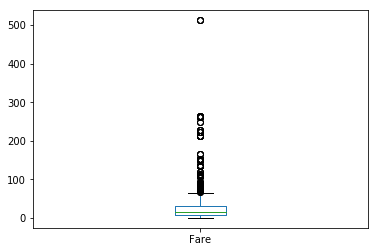

In [84]:
df.Fare.plot(kind='box')

In [85]:
#summary statistics fr numerical and categorical variable
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [86]:
#counts on categorical variables
df.Sex.value_counts()


male      843
female    466
Name: Sex, dtype: int64

In [87]:
#Proportion on categorical variable
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [88]:
#get the counts of total survived from the df dataset, first filter out the test data
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

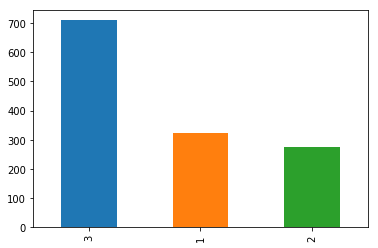

In [89]:
#visualize counts
df.Pclass.value_counts().plot(kind='bar')

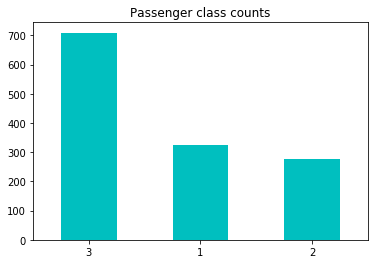

In [90]:
#improvement on visualization. rot=0 will rotate x axis labels, color=c means cyan, the ; hides intermediate msgs
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Passenger class counts', color='c');

## Distributions 

In [91]:
#create histogram, specify bins, pandas specifies default number of bins 

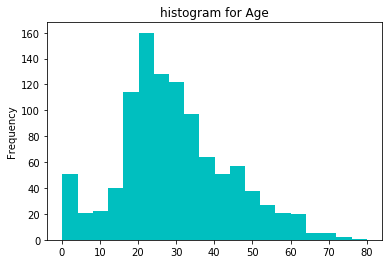

In [92]:
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20)

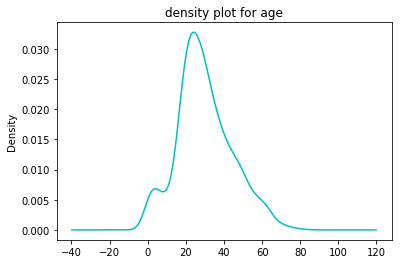

In [93]:
#create kde/density plot (same like freq density plot after histogram in R manual. ';' at end supress msgs)
df.Age.plot(kind='kde',title='density plot for age', color='c');

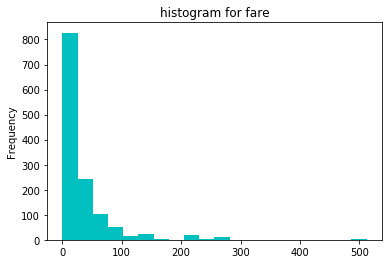

In [94]:
#hstogram for Fare
df.Fare.plot(kind='hist', title='histogram for fare', color='c', bins=20)

In [95]:
#skewness for Fare and Age
print('skewness for age : {0}, skewness for fare : {1}'.format((df.Age.skew()),(df.Fare.skew())))


skewness for age : 0.40767455974362266, skewness for fare : 4.367709134122922


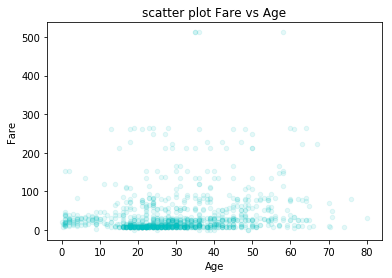

In [96]:
#scatterplot for bi-variate distribution. Fare and Age not related.
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot Fare vs Age', alpha=0.1)

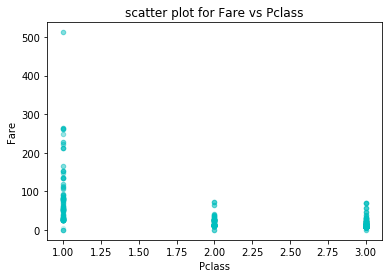

In [97]:
#scatterplot for Pclass vs Fare
df.plot.scatter(x='Pclass', y='Fare', color='c', title='scatter plot for Fare vs Pclass', alpha=0.15);

## Grouping and Aggregation

In [98]:
#group by. Then apply summarize fncs like mean(), median()
df.groupby('Sex').Age.mean()


Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [99]:
#can also use []
df.groupby(['Pclass']).Age.mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [100]:
#groupby multiple variables
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [101]:
#groupby, then apply multiple summarize fnc
df.groupby(['Sex'])['Age','Fare'].mean()

,Age,Fare
Sex,,
female,28.687088,46.198097
male,30.585228,26.154601


In [102]:
#group by Sex, then group by Pclass in each sex, then display Age and fare for each section. So total 2(1x3)
df.groupby(['Sex', 'Pclass'])['Age','Fare'].mean()

Age        Fare
Sex    Pclass                       
female 1       37.037594  109.412385
       2       27.499223   23.234827
       3       22.185329   15.324250
male   1       41.029272   69.888385
       2       30.815380   19.904946
       3       25.962264   12.415462

In [103]:
#aggregate fnc ..when different summary fnc for different variables. Agg() takes dictionary input ??
df.groupby('Pclass').agg({'Fare' : 'mean', 'Age' : 'median'})


,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [104]:
#complex aggregation
#first create a dictionary to be passed to agg()
aggregation = {
    'Fare' : {
        'mean Fare' : 'mean',
        'median fare' : 'median',
        'max fare' : 'max',
        'min fare' : 'min'
    },
    'Age' : {
        'mean age' : 'mean',
        'median age' : 'median',
        'min age' : min,
        'max age' : max,
        'range age' : lambda x: max(x) - min(x)
    }
}

df.groupby('Pclass').agg(aggregation)

/Users/sharmisthamaitra/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean Fare median fare  max fare min fare   mean age median age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                                  
       min age max age range age  
Pclass                            
1         0.92    80.0     79.08  
2         0.67    70.0     69.33  
3         0.17    74.0     73.83

## Crosstabs to gather info between categorical variables in tabular manner 

In [105]:
#use crosstab() of pandas/pd
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


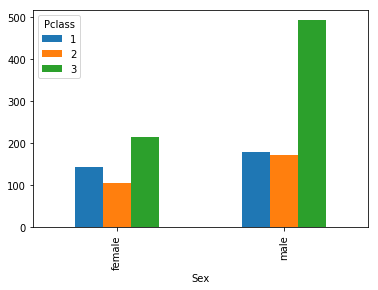

In [106]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

## Pivot tables. Can be thought as an extension of crosstab. Here we have 4 parameters
## 2 categorical, 1 numerical, 1 numerical aggregate func 

In [107]:
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc = 'mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [108]:
#same result like pivot table with groupby and summarize fnc
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [109]:
#Above result in tabular form (just like pivot table)
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data munging: Working with missing values 

In [110]:
#detect missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature: Embarked (Embarked has 2 missing values, explore Embarked) 

In [111]:
#extract rows with Embarked as Null
df[df.Embarked.isnull()]
#df.Embarked.isnull() shows all TRUE/FALSE entries for all rows 

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [112]:
#counts of passengers at different embarkment points shows S has highest number of people embarking. So maybe
#the missing embarkment values are S
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [113]:
#which embarkemnt point has highest number of survival. Shows people from S has highest survival.
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [114]:
#It might be good to replace missing Embarked with S, use very handy fillna() pandas function, fills all NA 
#with chosen value. Inplace=True with replace the df with the newly inserted values, no copied of old version kept
#df.Embarked.fillna('S', inplace=True)

In [115]:
#Explore median fare for embarked and Pclass. The median fare for C is ~76 close to 80. Since the passengers with
#,missing embarked had fare 80, it might be sensible to replace embarked with C
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [116]:
df.Embarked.fillna('C', inplace=True)

In [117]:
df.loc[62] #check to see if C exists

Age                          38
Cabin                       B28
Embarked                      C
Fare                         80
Name        Icard, Miss. Amelie
Parch                         0
Pclass                        1
Sex                      female
SibSp                         0
Survived                      1
Ticket                   113572
Name: 62, dtype: object

In [118]:
df.loc[830] #check to see if C exists

Age                                                62
Cabin                                             B28
Embarked                                            C
Fare                                               80
Name        Stone, Mrs. George Nelson (Martha Evelyn)
Parch                                               0
Pclass                                              1
Sex                                            female
SibSp                                               0
Survived                                            1
Ticket                                         113572
Name: 830, dtype: object

### Feature: Fare 

In [119]:
#see the rows with fares missing. Only 1....Pclass =3, Embarked = S
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [120]:
#we can find median fare of Pclass = 3, Embarked = S
#median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S')].Fare.median()

In [121]:
df.Fare.fillna(median_fare, inplace=True)

In [122]:
df.loc[1044] #check !!

Age                       60.5
Cabin                      NaN
Embarked                     S
Fare                      8.05
Name        Storey, Mr. Thomas
Parch                        0
Pclass                       3
Sex                       male
SibSp                        0
Survived                  -888
Ticket                    3701
Name: 1044, dtype: object

# Feature: Age


In [123]:
#set max rows to display = 15
pd.options.display.max_rows = 15

In [124]:
#find rows with age null. 263 rows.
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


#### Option 1: Replace all missing age with mean Age. See histogram. But Age has extreme values, so mean, median not good choice 

In [125]:
#df.Age.fillna(df.Age.mean(), inplace=True)

#### Option 2: Replace with median age by gender 

In [126]:
age_sex_median = df.groupby('Sex').Age.transform('median')
print(age_sex_median)
#df.Age.fillna(age_sex_median, inplace == True)

PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
6       28.0
7       28.0
        ... 
1303    27.0
1304    27.0
1305    28.0
1306    27.0
1307    28.0
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64


#### Option 4: Replace with median age of each title. Title (master, miss, lady, sir) has an effect on age.  

In [127]:
#See the structure of Name. See [10:15] index 10 (11th row) to 15 ????? !!!! ******
#Name has title followed by . and preceeded by ,, extract title
df.Name[10:15]

PassengerId
11         Sandstrom, Miss. Marguerite Rut
12                Bonnell, Miss. Elizabeth
13          Saundercock, Mr. William Henry
14             Andersson, Mr. Anders Johan
15    Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [128]:
#funtion to extract title
def GetTitle(name):
    first_name_with_title = name.split(',')[1] #get second part after . split of name
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower() #strip spaces. convert to lower case.
    return title
    

In [129]:
#use map() to apply the GetTitle() on each Name value in rows.
df.Name.map(lambda x : GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [130]:
df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [131]:
#get unique titles
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [132]:
#Make a dictionary , generalize the titles
def GetTitle(name):
    title_group = {'mr' : 'Mr',
                  'mrs' : 'Mrs',
                  'miss' : 'Miss',
                  'master' : 'Master',
                  'don' : 'Sir',
                  'rev' : 'Sir',
                  'dr' : 'Officer',
                  'mme' : 'Mrs',
                  'ms' : 'Mrs',
                  'major' : 'Officer',
                  'lady' : 'Lady',
                  'sir' : 'Sir',
                  'mlle' : 'Miss',
                  'col' : 'Offcer',
                  'capt' : 'Officer',
                  'the countess' : 'Lady',
                  'jonkheer' : 'Sir',
                  'dona' : 'Lady'
                   }
    first_name_with_title = name.split(',')[1] #get second part after . split of name
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower() #strip spaces. convert to lower case.
    return title_group[title] # access dictionary with [] brackets

In [133]:
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [134]:
df.head() #check to see if title column has been added

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


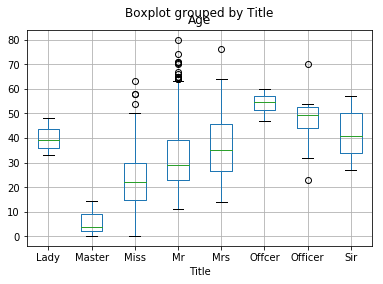

In [135]:
#box plot of age with title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [136]:
#replace missing age values
Age_Title_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(Age_Title_median, inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### Working with outliers

In [138]:
#find age greater than 70. Histogram indicates there are some ages > 70
df[df.Age > 70] #df.loc[df.Age > 70] also works

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


In [139]:
#find outlier fares
df[df.Fare == df.Fare.max()] #df[df.Fare > 400] also works

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


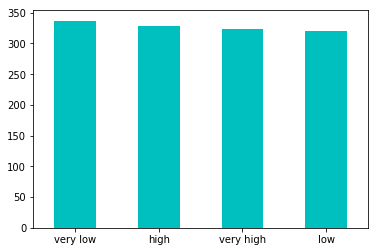

In [140]:
#Add a new column Fare_Bin to define fares into 4 buckets
#This is also an example of categorization of continuous variables, or discretization
pd.qcut(df.Fare, 4, labels=['very low','low','high','very high']).value_counts().plot(kind='bar', color='c', rot=0);

In [141]:
df['Fare_bin'] = pd.qcut(df.Fare, 4, labels=['very low','low','high','very high'])

In [142]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,very low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs,very high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs,very high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr,low


## Create Age_state feature, adult or child 

In [143]:
df['Agestate'] = np.where(df.Age >= 18, 'Adult', 'Child') #df['Age'] also works

In [144]:
#do a crosstab to see more prop of children survived than adult
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Agestate)

Agestate,Adult,Child
Survived,,
0,495,54
1,279,63


### create feature FamilySize 

In [146]:
df['FamilySize'] = df.Parch + df.SibSp + 1 #+1 fo self

In [151]:
#find max family size. There is a family with 11 members, most of whom did not survive
#df[df.FamilySize == df.FamilySize.max()]


In [152]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Create Feature: IsMother .. to see if mothers had better rate of survival 

In [153]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [154]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Create Feature: Deck 

In [155]:
#exolore cabin valus
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [156]:
#there is one row with cabin = T
df[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_bin,Agestate,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very high,Adult,1,0


In [157]:
#set T to Nan, possibly wrong data. Specify 'Cabin', otherwise all attributes in that row will be assigned Nan
#Also df.loc needed.
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [158]:
df.loc[340]

Age                                     45
Cabin                                  NaN
Embarked                                 S
Fare                                  35.5
Name          Blackwell, Mr. Stephen Weart
Parch                                    0
Pclass                                   1
                          ...             
Survived                                 0
Ticket                              113784
Title                                   Mr
Fare_bin                         very high
Agestate                             Adult
FamilySize                               1
IsMother                                 0
Name: 340, Length: 16, dtype: object

In [159]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [160]:
#extract first character of cabin to form deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df.Cabin.map(lambda x : get_deck(x))

In [161]:
#people in deck B, C, D,E survived more
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


## Categorical feature encoding 

In [162]:
#Most machine language algorithms dont work with non-numeric categorical variables. So categorical variables need to be converted 
#to numeric
#1. Binary encoding : Male, Female => 1,0
#2. Label encoding: Fare High, Fare Med, Fare Low => 3,2,1
#3. One hot encoding...where the categorical variable values have no particular order, for example Deck, use this.
#Create a category for each value in it, Is_Deck_A, Is_deck_B, Is_Deck_C=> 100/010/001 etc ( 3 bits define each feature

#Sex binary encoding
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [163]:
#one hot encoding using pd.get_dummies()
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_bin', 'Embarked', 'Agestate'])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 40 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

## Drop unnecessary cols, reorder cols, Survived shld be 1st col 

In [165]:
#drop cols which are not needed. All these cold have been used to create other features, so redundant
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [166]:
#reorder cols. Copy all cols as is, except Survived col. Then add Survived in front
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

## Save processed data in a dataframe, store it in working directory, under /data/processed

In [167]:
#creating paths to processed train.csv and test.csv
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [169]:
#train data
df.loc[df.Survived != -888].to_csv(write_train_path)
#test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)
